<a href="https://colab.research.google.com/github/mnshcodie/IIScEx_2021/blob/main/M2_AST_13_PCA_%26_SVM_Regression_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Programme in Deep Learning (Foundations and Applications)
## A Program by IISc and TalentSprint
### Assignment 13: Principal Component Analysis (PCA) and Support Vector Machines - Regression

## Learning Objectives


At the end of the experiment, you will be able to:

* compute co-variance matrix
* calculate the eigen values and eigen vectors
* apply PCA using sklearn package
* Perform PCA using selected no of principal components
* apply support vector classifier on the PCA reduced data
* perform support vector machines - Regression

## Dataset

### History

Breast cancer (BC) is one of the most common cancers among women in the world today. Currently, the average risk of a woman in the United States developing breast cancer sometime in her life is about 13%, which means there is a 1 in 8 chance she will develop breast cancer!. An early diagnosis of BC can greatly improve the prognosis and chance of survival for patients. Thus an accurate identification of malignant tumors is of paramount importance.

### Description

The Breast cancer Data Set consists of 569 data instances. This is a binary classification problem which consists of 2 types of cancer classes. The tumor is classified as **benign (1)** or **malignant (0)** based on its geometry and shape. 

The features of the dataset include:

* ID number
* Diagnosis (M = malignant, B = benign) 

Ten real-valued features are computed for each cell nucleus:

* radius (mean of distances from center to points on the perimeter) 
* texture (standard deviation of gray-scale values) 
* perimeter 
* area 
* smoothness (local variation in radius lengths) 
* compactness (perimeter^2 / area - 1.0) 
* concavity (severity of concave portions of the contour) 
* concave points (number of concave portions of the contour) 
* symmetry 
* fractal dimension ("coastline approximation" - 1)


The mean, standard error and “worst” or largest (mean of the three largest values) of these features were computed for each image, resulting in 32 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

Class distribution: 357 benign, 212 malignant

Data source to this experiment : https://archive.ics.uci.edu/ml/datasets/breast+cancer

This analysis aims to observe which features are most helpful in predicting malignant or benign cancer. The goal is to classify whether the breast cancer is benign or malignant.


## Domain Information

Many machine learning problems involve a vast number of features for each training instance, making the training extremely slow and harder to find a good solution. This problem is called the **curse of dimensionality**. Therefore, we need dimensionality reduction techniques, that transform data from a high-dimensional space into a low-dimensional space so that the low-dimensional representation retains most meaningful properties of the original data. Dimensionality reduction speeds up training and is also extremely useful for data visualization. One of the main approaches to reducing dimensionality is data projection. 

#### Projection

In most real-world problems, training instances are not spread out uniformly across all dimensions. Many features are almost constant, while others are highly correlated. As a result, all training instances lie within a much lower-dimensional subspace of the high-dimensional space.

In the figure below a 3D dataset is represented by circles.

<br><br>
<center>
<img src="https://cdn.iisc.talentsprint.com/CDS/Images/pca1.png" width=450px/>
</center>

$\hspace{8.6cm} \text{A 3D dataset lying close to a 2D subspace}$
<br><br>

Notice that all training instances lie close to a plane which is a lower-dimensional (2D) subspace of the high-dimensional (3D) space. 

After projecting every training instance perpendicularly onto this subspace, we get the new 2D dataset as shown in the figure below. By that, we reduced the dataset’s dimensionality from 3D to 2D.

<br><br>
<center>
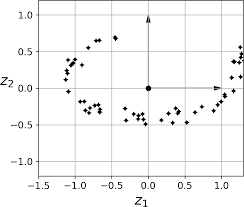
</center>

$\hspace{10cm} \text{The new 2D dataset after projection}$
<br><br>

The most common dimensionality reduction method, that applies projection is:

* PCA (Principal Component Analysis)

### Setup Steps:

In [ ]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "" #@param {type:"string"}

In [ ]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "" #@param {type:"string"}

In [ ]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython
import warnings
warnings.filterwarnings("ignore")

ipython = get_ipython()
  
notebook= "M2_AST_13_PCA_&_SVM_Regression_B" #name of the notebook

def setup():
    ipython.magic("sx wget https://cdn.iisc.talentsprint.com/DLFA/Experiment_related_data/data.csv")
    ipython.magic("sx wget https://cdn.iisc.talentsprint.com/DLFA/Experiment_related_data/Housing_data.csv")
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None
    
    elif getAnswer1() and getAnswer2() and getComplexity() and getAdditional() and getConcepts() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer1" : Answer1, "answer2" : Answer2, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}
      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:        
        print(r["err"])
        return None   
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://dlfa.iisc.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if not Additional: 
      raise NameError
    else:
      return Additional  
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None
  
  
# def getWalkthrough():
#   try:
#     if not Walkthrough:
#       raise NameError
#     else:
#       return Walkthrough
#   except NameError:
#     print ("Please answer Walkthrough Question")
#     return None
  
def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None
  

def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer1():
  try:
    if not Answer1:
      raise NameError 
    else: 
      return Answer1
  except NameError:
    print ("Please answer Question 1")
    return None

def getAnswer2():
  try:
    if not Answer2:
      raise NameError 
    else: 
      return Answer2
  except NameError:
    print ("Please answer Question 2")
    return None
  

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup() 
else:
  print ("Please complete Id and Password cells before running setup")



### Importing required packages

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVC 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

### Loading the dataset

In [ ]:
breast_cancer = pd.read_csv('data.csv')
breast_cancer.head()

In [ ]:
# The dataset has 569 instances and 32 features
print(breast_cancer.shape)

Get a count of the number of Malignant (M) or Benign (B) cells and visualize the count.


In [ ]:
breast_cancer['diagnosis'].value_counts()

In [ ]:
sns.countplot(breast_cancer['diagnosis'], label = 'count');

### Storing features and labels from the data

In [ ]:
# YOUR CODE HERE: Extracting features from cancer data and drop the 'diagnosis', 'id' column

In [ ]:
# YOUR CODE HERE: Extracting labels from cancer data

Encode the categorical data values

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

In [ ]:
encoded_labels[:20]

Let's check the correlation between the features

In [ ]:
plt.figure(figsize=(15, 12))
sns.heatmap(features.corr(), annot=True);

## Principal Component Analysis (PCA)

 
It is defined as the orthogonal transformation of the data into a series of uncorrelated principal components such that the first component explains the most variance in the data with each subsequent component explaining less.

This technique is particularly useful in processing data where multi-colinearity exists between features or when the dimensions of features are high. Using PCA we project the data on a subset of input space.

PCA is a dimensionality-reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of data on a subset of input space that still contains most of the information in the large set and we project data on the subspace with maximum variance.

###  Mathematical calculation of eigen values and eigen vectors

Step 1:   Standardization

Step 2:   Compute the Covariance matrix

Step 3:  Compute the Eigenvalues and Eigenvectors of the Covariance matrix to identify the principal components

#### 1. Standardization (Scaling the data)

Standardize the range of the continuous initial variables so that each one of them contributes equally to the analysis. For instance all features are centered around 0 and have variance in the same order. If a feature has a variance that is orders of magnitude larger than others, it might dominate the objective function.

So, for each observed value of the variable, subtract the mean and divide by the standard deviation.


In [ ]:
# Define a function for standardization of the data
def standardization(features):

    # Loop through each feature in the dataset
    for feature_name in features:

        # For each feature subtract the mean 
        features[feature_name] -= features[feature_name].mean()

        # Divide by the standard deviation
        features[feature_name] /= features[feature_name].std()
        
    return features

In [ ]:
# Call the 'standardization' function by passing the dataset features
scaled_data = standardization(features)

In [ ]:
# Print the first five rows of the scaled data
scaled_data.head()

#### 2. Compute the covariance matrix

For a given dataset $X = {x_1, . . . , x_N }, X ∈ R^D $. Compute the matrix $\boldsymbol X\boldsymbol X^T$ (a $N$ by $N$ matrix with $N \ll D$), where D is the dimension of the sample in the dataset, and N is the number of samples in the dataset.

Covariance is to measure how the variables of the input dataset are varying from the mean with respect to each other. It gives the variance between each feature in our original dataset. 

The covariance matrix is a d × d symmetric matrix (d is the number of dimensions) where each element represents the covariance between two features.

Assume $X$ is the standardized data, then Co-variance Matrix of $X$ would be, $Σ =\tfrac{X^T.X}{n - 1} $ 

where $X^T$ = Transpose of matrix $X$ and n is number of samples. 

http://www.stat.ucdavis.edu/~xdgli/Xiaodong_Li_Teaching_files/135Note2.pdf


In [ ]:
# Number of samples
n = scaled_data.shape[0]

# YOUR CODE HERE: Compute the co-variance matrix

#### 3. Compute the Eigenvalues and Eigenvectors 

After the covariance matrix is generated, eigen decomposition is performed on the covariance matrix. Eigenvectors and Eigenvalues are found as a result of the eigen decomposition. 

Eigenvectors of a covariance matrix are actually the directions of the axes where there is a most variance (most information).

Eigenvalues (importance of these different directions) are coefficients attached to each Eigenvector. Each Eigenvector has a corresponding Eigenvalue, and the sum of the Eigenvalues represents all of the variance within the entire dataset.

Compute eigenvalues $\lambda$s and eigenvectors $V$ for $\boldsymbol X\boldsymbol X^T$ matrix. Compute the eigenvectors for the original covariance matrix as $\boldsymbol X^T\boldsymbol V$. Choose the eigenvectors associated with the 'M (cov_mat)' largest eigenvalues to be the basis of the principal subspace.


In [ ]:
# YOUR CODE HERE: To find eigenvalues and corresponding eigenvectors for cov_mat

Eigenvectors are the principal components. The first principal component is the first column and the second principal component is the second column and so on. Each Eigenvector will correspond to an Eigenvalue, each eigenvector can be scaled of its eigenvalue, whose magnitude indicates how much of the data’s variability is explained by its eigenvector.

Arrange the eigen values in the descending order and compute the variance explained for each dimension. It provides the percentage of variance explained at each of the dimensions.

In [ ]:
# Total sum of the eigen values
tot = sum(eig_vals)
# Percentage of variance for each principal component
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
print(var_exp)

Cumulative sum provides the percentage of variance accounted for by the first n components.

For example, the cumulative percentage for the second component is the sum of the percentage of variance for the first and second component and so on.

In [ ]:
# YOUR CODE HERE: Find the cumulative sum for the variance explained by each dimension

plot the cumulative sum variance as a function of the number of components/dimensions and check for an elbow in the curve to select the principal components. Cumulative sum is used to display the total sum of data as it grows with each component.

In [ ]:
plt.plot(cumsum)
plt.xlabel('number of components')
plt.ylabel('Captured variance') 
plt.show()

Since eigen values capture the variance by each component in the direction of the eigen vector. We can see the percentage of variance contributed by each feature which in turn contributes to the predicting power.

plot to find the maximum variance between each principal component



In [ ]:
fig = plt.figure(figsize=(15, 8))
# Plot the explained variance around each dimesnion
plt.bar(range(1, len(var_exp)+1), var_exp)
plt.xticks(np.arange(0, 35, 5))
plt.xlabel('Number of components')
plt.ylabel('Percentage of variance')
plt.show()

The first seven components together covering most of the information about (91%). So, the remaining components can be dropped without losing much information.

We can then compute the projection and reconstruction of the data onto the space spanned by the top $n$ eigenvectors (no. of principal components).

We compute the projection matrix onto the space spanned by `B` where, B: ndarray of dimension (D, M), the basis for the subspace where D is the dimension of the data, and N is the number of datapoints which returns the projection matrix.

we assume there exists a low-dimensional compressed representation $z_n = B^T X ∈ R^M$ of $X$, where we define the projection matrix $B = [b_1,...b_M] ∈ R^{D×M}$. We assume that the columns of B are orthonormal so that $b_i^T b_j = 0$ if and only if $i \neq j$ and $b_i^T b_j = 1$. We seek an M-dimensional subspace $U ⊆ R^D$, $dim(U) = M < D$ onto which we project the data. 


In [ ]:
# Select the top 7 eigen vectors (principal components)
B = eig_vecs[:, :7]

# Dimensionality reduction of the original data to 7 principal compoenents
X = scaled_data.dot(B)

print(X.shape)

In [ ]:
# Reconstruct the data from the lower dimensional representation
X_reconstruct = X.dot(B.T)
print(X_reconstruct.shape)

### Applying PCA using sklearn package

Scikit-Learn’s `PCA` class uses singular value decomposition (SVD) decomposition to implement PCA.

To know more about Scikit-Learn’s `PCA` class, click [here](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html).




#### Apply PCA on the scaled data


In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(scaled_data);

#### Principal Components using the Explained Variance Ratio

pca.explained_variance_ratio_ parameter returns a vector of the variance explained for each dimension.

PCA function provides explained_variance_ratio_ which gives the percentage of explained variance at each of the selected components.

In [ ]:
# YOUR CODE HERE: To compute the explained variance ratio and sort the variance

44.27% of variance on the data is explained by the first principal component, the second principal component explains 18.97% of data

Cumulative variance in PCA gives the percentage of variance accounted for by the first n components.

For example, the cumulative percentage for the second component is the sum of the percentage of variance for the first and second component and so on.

In [ ]:
cumsum_explained_variance = np.cumsum(variance)
print(cumsum_explained_variance)

If we use the first feature, it will explain 44.27% of the data; If we consider two features we can capture 63.2% of the data. If we use all features we can describe the entire dataset.

#### Determining how many number of components

Instead of arbitrarily choosing the number of dimensions to reduce down to, we can either

* select 2 or 3 dimensions for data visualization

* choose the number of dimensions that add up to a sufficiently large portion of the variance (e.g., `PCA(n_components=0.92)` for 92% variance)

* Visualize the eigenvalues in order from highest to lowest, connecting them with a line. Upon visual inspection, keep all the components whose eigenvalue falls above the point where the slope of the line changes the most drastically, also called the “elbow”

* plot the cumulative explained variance as a function of the number of components/dimensions and check for an elbow in the curve

In [ ]:
# YOUR CODE HERE: Visualize Explained variance as a function of the number of dimensions

#### Plotting the variance percentage at each principal component

Cumulative sum is used to display the total sum of data as it grows with each component (or any other series or progression). It is view of the total contribution so far of a given measure against principal components.


In [ ]:
# Finding the variance between the each principal component
fig = plt.figure(figsize=(15, 8))
tot = sum(variance)
var_exp = [(i / tot)*100 for i in sorted(variance, reverse=True)]
plt.bar(range(1,len(var_exp)+1), var_exp)
plt.xlabel('Number of components')
plt.ylabel('Percentage of variance')
plt.show()

In [ ]:
# Print the 'var_exp' and select the no of principal components where the highest variance is preserved
print(var_exp)

From the above plot, the first 7 principal components together contain 91% of the information. So, reducing the dimensionality to about 7 number of principal components  wouldn’t lose too much explained variance. So, remaining components can safely be dropped without losing much information.

#### PCA for Compression

After dimensionality reduction, the training set takes up much less space. This size reduction can speed up a classification algorithm tremendously.

we will find low-dimensional representations that retain as much information as possible and minimize the compression loss where, we will be looking at minimizing the squared reconstruction error $||X - \bar{X}||^ 2$ between the original data and its projection.

We can also decompress the reduced dataset back to original dimensions by applying the inverse transformation of the PCA projection.

In the following code:

1. First we iterate through the different number of principal components
2. Perform PCA on a range of selected number of components by using `PCA(n_components)`. Here, `n_components` represents how many optimum features need to be used to represent the data without having data loss.
3. By applying `pca.fit_transform` method compress the dimensionality of the original dataset
4. Then by using `pca.inverse_transform` method decompresses it back to original 30 dimensions
5. Compute the reconstruction error (MSE), between the original dataset and the decompressed data




In [ ]:
def mse(predict, actual):
    """Helper function for computing the mean squared error (MSE)"""
    return np.square(predict - actual).sum(axis=1).mean()    

In [ ]:
loss = []

# Iterate over different numbers of principal components, and compute the MSE
for num_component in range(1, 31):
    pca = PCA(n_components=num_component)

    # YOUR CODE HERE: To fit PCA on the scaled data

    # Reconstruct the original data
    reconst_data = pca.inverse_transform(reduced_data)

    # YOUR CODE HERE: Compute the reconstruction error between the original and the projected data
    
loss = np.asarray(loss)

Here the data compression is not lossless. The data after decompression won't be exactly the same as the original. It will be an approximation.

How can you evaluate the performance of a dimensionality reduction algorithm on your dataset?

Intuitively, a dimensionality reduction algorithm performs well if it eliminates a lot of dimensions from the dataset without losing too much information. One way to measure this is to apply the reverse transformation and measure the reconstruction error. However, not all dimensionality reduction algorithms provide a reverse transformation. Alternatively, if you are using dimensionality reduction as a preprocessing step before another Machine Learning algorithm (e.g., a Support Vector classifier), then you can simply measure the performance of that second algorithm; if dimensionality reduction did not lose too much information, then the algorithm should perform just as well as when using the original dataset

### Plotting MSE vs no of principal components

In [ ]:
fig = plt.figure(figsize=(15, 8))
plt.plot(loss[:,0], loss[:,1]);
plt.xticks(np.arange(1, 31, 1))
plt.xlabel('Number of components')
plt.ylabel('Mean Square Error')
plt.title('MSE vs number of principal components')
plt.show()

From the above plot, we can observe as the number of principal components increases, which is the number of eigenvectors used to build the feature space, we can see the mean square error is decreasing. We also observe that when the number of components approaches the number of features that we use to build the feature space, the error is close to 0. The greater number of of principal components we use, the smaller will our reconstruction error be.

#### Apply PCA after selecting the '7' principal components

Here `n_components` represents how many optimum features need to be used to represent the 30 dimensional data without having data loss.

In [ ]:
# Perform PCA after selecting the optimum no. of principal components
pca = PCA(n_components=7)

# YOUR CODE HERE: Fit the original data

# YOUR CODE HERE: Reconstruct back the original data

In [ ]:
print(reconst_data.shape)

You can compare the reduced data using PCA from scikit learn with the mathematical approach for projecting the data to low-dimensional subspace and reconstructing the data back to original data of 30 features 

#### Visualization of first 2 principal components in 2D

In [ ]:
# YOUR CODE HERE

### Split the data into train and test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(pca_transformed, encoded_labels, random_state=1)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

### Train the Support Vector Classifier with reduced data

In [ ]:
clf = SVC(kernel='linear')

# YOUR CODE HERE: Train the model

# YOUR CODE HERE: Get the prediction on the test set

# YOUR CODE HERE: Calculate the accuracy

print("Accuracy of test data is",accuracy)

### Model Evaluation

#### Classification Report

In [ ]:
# YOUR CODE HERE: To print the classification report

#### Confusion Matrix

In [ ]:
mat = confusion_matrix(Y_test, predicted)
# Visualizing the confusion matrix as a heatmap
sns.heatmap(mat.T, square=True, annot=True, fmt='d')
plt.xlabel('true label')
plt.ylabel('predicted label');

## Support Vector Machine - Regression (SVR)

To use SVMs for regression instead of classification, the trick is to reverse the objective: instead of trying to fit the largest possible street between two classes while limiting
margin violations, SVM Regression tries to fit as many instances as possible
on the street while limiting margin violations (i.e., instances off the street). The width of the street is controlled by a hyperparameter, ε

![Image](https://www.saedsayad.com/images/SVR_2.png)

## Problem Statement: Boston house price prediction

### Introduction

The problem that we are going to solve here is that given a set of features that describe a house in Boston, our machine learning model must predict the house price. 

Following are the details of each feature/attribute of the given dataset.

In the dataset, each row describes a boston town or suburb. There are 506 rows and 13 attributes (features) with a target column MEDV (price).

### Dataset Description

The Boston House Price Dataset involves the prediction of a house price in thousands of dollars given details of the house and its neighborhood.

The dataset contains 506 rows and 14 columns. It consists of price of houses in various locations in Boston. Along with price, the dataset also provides information such as :

* CRIM - per capita crime rate by town.
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS- Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
* NOX - nitrogen oxides concentration (parts per 10 million).
* RM - average number of rooms per dwelling.
* AGE - proportion of owner-occupied units built prior to 1940.
* DIS - weighted mean of distances to five Boston employment centres.
* RAD - index of accessibility to radial highways.
* TAX - full-value property-tax rate per $10,000$.
* PTRATIO - pupil-teacher ratio by town.
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.
* LSTAT - Percentage of lower status of the population
* MEDV (price) - Median value of owner-occupied homes in $1000s - target column


#### Loading the Boston dataset

In [ ]:
boston_data = pd.read_csv("Housing_data.csv")
boston_data.head()

In [ ]:
# Check the shape of dataframe
boston_data.shape

#### Check for missing values


In [ ]:
# YOUR CODE HERE: Check for missing values

There is no missing values in the dataset.



In [ ]:
# Viewing the data statistics
boston_data.describe()

In [ ]:
# Finding out the correlation between the features
corr = boston_data.corr()
corr.shape

#### Visualization of Correlation Matrix

From the below matrix, we observe that the highly correlated features has the correlation value close to 1. 

In [ ]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(15,8))
sns.heatmap(corr, cmap = 'Wistia', annot= True);

In [ ]:
# YOUR CODE HERE: Spliting target variable and independent variables

In [ ]:
# Reshape the target variable as the MinMaxScaler expects 2D array
y = y.reshape(len(y), 1)

### Normalizing the data

For the above dataset you can observe that the ranges of different continuous variables are different. This is actually problematic. Therefore, we perform normalization for continuous variable.
  
The goal of normalization is to change the values of numeric columns in the dataset to a common scale without distorting differences in the ranges of values. We normalize the data to bring all the variables to the same range.


In [ ]:
sc = MinMaxScaler()
X = sc.fit_transform(X)
y = sc.fit_transform(y)

### Split the dataset into train and test sets

In [ ]:
# YOUR CODE HERE: Splitting to training and testing data

### Fit the SVM Regressor

#### Train the model using 'linear' kernel

In [ ]:
# Import SVM Regressor
from sklearn.svm import SVR

# YOUR CODE HERE: Create a SVM Regressor using 'linear' kernel

# YOUR CODE HERE: Train the linear model using the training sets 

# YOUR CODE HERE: Model prediction on train data using 'linear' kernel

#### Visualization of Actual vs Predicted prices (Linear Kernel)

In [ ]:
# YOUR CODE HERE: Visualizing the differences between actual prices and predicted values

#### Model Evaluation 

$R^2$  is a measure of the linear relationship between X and y. It is interpreted as the proportion of the variance in the dependent variable that is predictable from the independent variable.  $R^2$  is always between 0 to 100%. 0% indicated that model explains none of the variability of the response data around it's mean. 100% indicated that model explains all the variablity of the response data around the mean.

$R^2$ = 1−$\frac{SSE}{SST}$
 
SSE = Sum of Square Error

SST = Sum of Square Total

$SSE = \sum_{i=1}^{m} (\hat{y}_{i}−y_{i})^2$

$SST = \sum_{i=1}^{m} (y_{i}−\bar{y}_{i})^2$

 
Here  $\hat{y}$  is predicted value and  $\bar{y}$  is mean value of  y

**RMSE:** Root mean squared error (RMSE) is the square root of the mean of the square of all of the error. RMSE is a way to measure the accuracy, but only to compare prediction errors of different models or model configurations for a particular variable and not between variables, as it is scale-dependent. We compute Root Mean Square Error using formula.

$RMSE = \frac{1}{n} \sum_{i=1}^{n} ({S_i} − O_{i})^2$


where $O_i$ are the observations, $S_i$ predicted values of a variable, and 'n'
the number of observations available for analysis.





In [ ]:
# YOUR CODE HERE: Predicting Test data with the linear model

In [ ]:
# Model Evaluation
R_square = r2_score(y_test, y_test_pred_linear)
print('R square on SVR Linear Kernel:', R_square)

print('Root Mean Square Error on SVR Linear Kernel:',np.sqrt(mean_squared_error(y_test, y_test_pred_linear)))

The R square value denotes the accuracy of the model. As the accuracy of the model increases, the R square value reaches close to 1.

#### Train the model using 'rbf' kernel

In [ ]:
# YOUR CODE HERE: Create a SVM Regressor using 'rbf' kernel

In [ ]:
# YOUR CODE HERE:Train the model using the training sets 

The follwing are the details of the parameters used in the SVM Regressor:

C : float, optional (default=1.0): The penalty parameter of the error term. It controls the trade off between smooth decision boundary and classifying the training points correctly.

kernel : string, optional (default='rbf’): kernel parameters selects the type of hyperplane used to separate the data. It must be one of 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed’ or a callable.

degree : int, optional (default=3): Degree of the polynomial kernel function (‘poly’). Ignored by all other kernels.

gamma : float, optional (default='auto’): It is for non linear hyperplanes. The higher the gamma value it tries to exactly fit the training data set. Current default is 'auto' which uses 1 / n_features.

coef0 : float, optional (default=0.0): Independent term in kernel function. It is only significant in 'poly' and 'sigmoid'.

shrinking : boolean, optional (default=True): Whether to use the shrinking heuristic.

In [ ]:
# YOUR CODE HERE: Model prediction on train data

#### Visualization of Actual vs Predicted prices (RBF Kernel)





In [ ]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred_rbf)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted prices")
plt.title("Actual Prices vs Predicted prices")
plt.show()

In [ ]:
# Predicting Test data with the model
y_test_pred_rbf = rbf_regressor.predict(X_test)

#### Model Evaluation for the test data


In [ ]:
# YOUR CODE HERE: Model Evaluation - compute  R square and root mean square error

### Please answer the questions below to complete the experiment:




#### Consider the following statement about Principal Component Analysis (PCA) and answer Q.1.

A. PCA is a supervised dimensionality reduction technique

B. All Principal components are orthogonal to each other

C. PCA computes the direction in which the data has the largest variance

D. PCA is non-linear dimensionality reduction technique

In [ ]:
#@title Q.1.Which of the above options is/are true regarding Principal Component Analysis (PCA)? { run: "auto", form-width: "500px", display-mode: "form" }
Answer1 = "" #@param ["","Only A", "Only B", "Both B and C", "Both C and D", "All of the above"]

#### Consider the following problem and answer Q.2.

##### For the given 2D data (X, Y) = (1, 6), (2, 7), (3, 8), (4, 9), (5, 10), or represented as follows: 
\\
\begin{bmatrix}
1 & 6   \\
2 & 7   \\
3 & 8   \\
4 & 9   \\
5 & 10   \\
\end{bmatrix}

\\
Compute the following :-

1. The covariance matrix

2. The eigenvalues and eigenvectors of the covariance matrix

The first Principal Component (eigenvector with highest variance) are given as follows:

A. \begin{bmatrix}
-\frac{1}{\sqrt2}  \\
-\frac{1}{\sqrt2} \\
\end{bmatrix}

B. \begin{bmatrix}
-\frac{1}{2}  \\
-\frac{1}{2} \\
\end{bmatrix}

C. \begin{bmatrix}
\phantom{-}\frac{1}{2}  \\
-\frac{1}{2} \\
\end{bmatrix}

D. \begin{bmatrix}
\frac{1}{\sqrt2}  \\
\frac{1}{\sqrt2} \\
\end{bmatrix}


In [ ]:
#@title Q.2. Which is the first Principal Component (eigenvector along which the variance of the data is the highest) for the given dataset from the choices above computed from the Covariance Matrix? Please manually solve the problem yourself and compare it with experimental results.{ run: "auto", form-width: "500px", display-mode: "form" }
Answer2 = "" #@param ["","A", "B", "C", "D", "None of the above"]

In [ ]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [ ]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "" #@param {type:"string"}


In [ ]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "" #@param ["","Yes", "No"]


In [ ]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [ ]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [ ]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")